# Homework

## LinearRegression / LogisticRegression

Week3 : 선형회귀, 로지스틱 회귀 모델 처리

In [1]:
# import Library
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [3]:
DATA_DIR = Path('./data')
train_file = DATA_DIR / 'train.csv'

In [4]:
train = pd.read_csv(train_file, index_col=0)
train.head()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


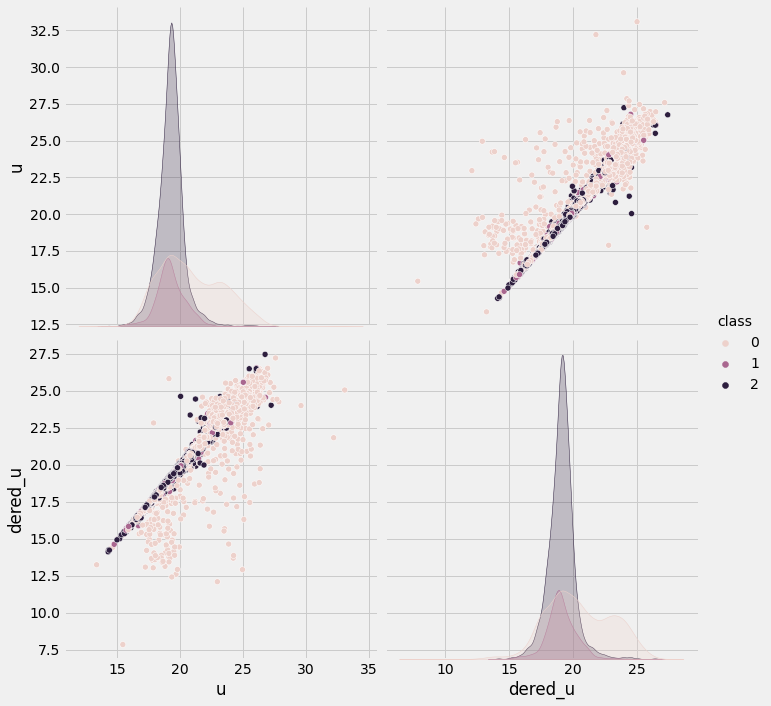

In [5]:
# use i, z as feature
sns.pairplot(train.sample(n=10000), vars=['u', 'dered_u'], hue='class', size=5)

In [6]:
# class 가 1, 2 인 데이터로 진행
X = train[train['class'] != 0][['u']].values
y = train[train['class'] != 0]['dered_u'].values
print(X.shape, y.shape)

(200004, 1) (200004,)


In [7]:
# Root Mean Square Deviation;RMSE loss function
loss_func = lambda y, p: np.sqrt(np.mean((y - p) ** 2))

In [8]:
alpha = .001
theta0 = .1
theta1 = .1
epoch = 4

In [9]:
x = X.flatten()

In [10]:
rmses = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(x, y):
        p_i =  theta0 + theta1 * x_i
        theta0 = theta0 + alpha * (y_i - p_i)
        theta1 = theta1 + alpha * (y_i - p_i) * x_i
    rmses.append(loss_func(y, theta0 + theta1 * x))

In [11]:
theta1, theta0

(0.9362306162023849, 1.1088813148478316)

In [12]:
rmses

[0.25618215910731906,
 0.25492967552380746,
 0.25461791287963526,
 0.25454708923095914]

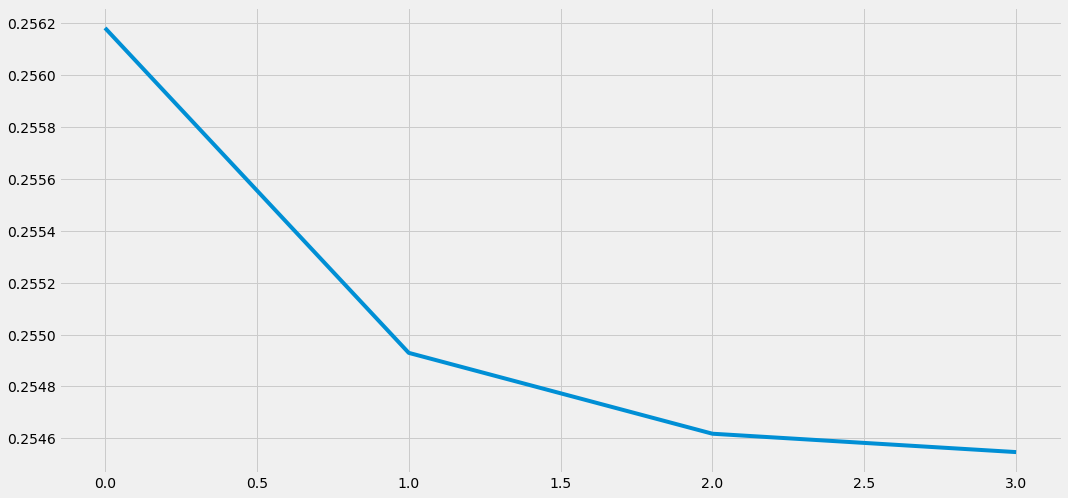

In [13]:
plt.plot(rmses)

Text(0, 0.5, 'dered_u')

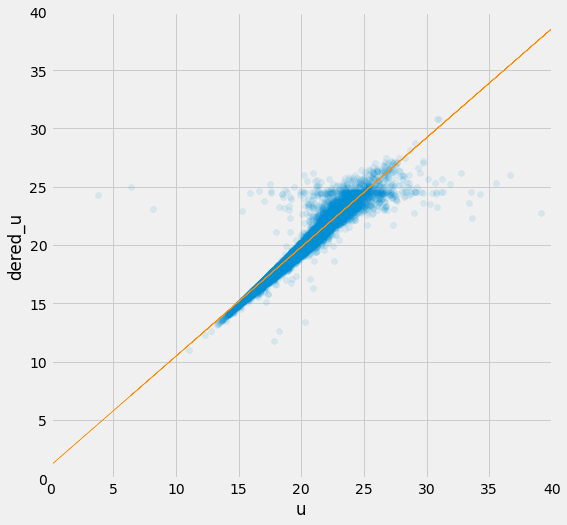

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, theta0 + theta1 * x, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

## scikit-learn LinearRegression

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
p = lr.predict(X)

In [16]:
X

array([[15.05214741],
       [16.7004023 ],
       [19.14231068],
       ...,
       [22.01838121],
       [18.36564762],
       [18.68563904]])

In [17]:
loss_func(y, p)

0.2522450693360897

In [18]:
# coef_ : coefficients (계수)
# intercept_ : independent term in the linear model
lr.coef_, lr.intercept_

(array([0.9320425]), 1.1556424178625342)

Text(0, 0.5, 'dered_u')

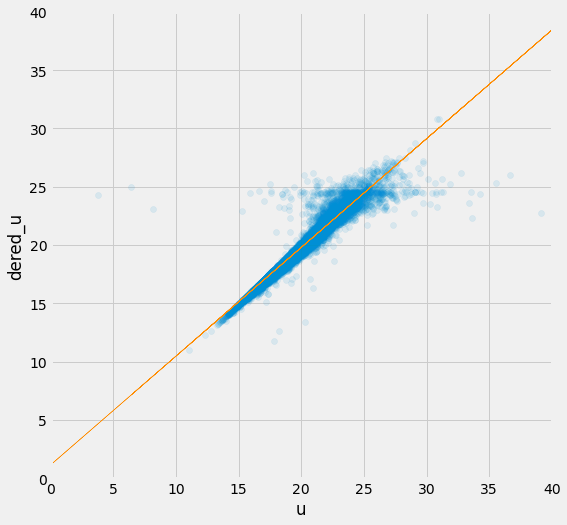

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, p, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

### Linear Regression Prediction 코드

In [50]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# lr_train = train
lr_train = train[train['class'] != 0]

X = lr_train.drop('class', axis=1)

# y = lr_train[lr_train['class'] != 0]['class'].values
# y: 0=1, 1=2 class
lr_train['class'] -= 1
y = lr_train['class'].values

In [51]:
x_col = ['u', 'dered_u']
y_col = 'class'
p_col = 'prediction'

# Linear Regression
lr = LinearRegression()
# lr.fit(X, y)
lr.fit(lr_train[x_col], lr_train[y_col])

# [trn['class'] != 0]
# lr_train[p_col] = lr.predict(X)
lr_train[p_col] = lr.predict(lr_train[x_col])

lr_train

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class,prediction
id,,,,,,,,,,,,,,,,,,,,
1,15.0521,14.0620,13.4524,13.2684,13.1689,0.0045,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,0,0.7978
5,16.7004,15.5068,14.9788,14.6755,14.5155,0.0150,16.5156,15.3776,14.8876,14.6055,14.4539,1,1,1.1722,1.1785,1.1660,1.1691,1.1753,1,0.7908
7,19.1423,17.5608,16.8015,16.3638,16.0796,0.1031,18.8354,17.3520,16.6565,16.2546,15.9904,2,2,1.1734,1.1771,1.1698,1.1716,1.1752,1,0.7812
8,18.5813,17.2868,16.6770,16.2728,16.0372,0.0839,18.2976,17.0616,16.5214,16.1575,15.9535,4,4,1.3184,1.3280,1.3090,1.3137,1.3232,1,0.7832
10,19.0419,18.0166,17.6723,17.3874,17.2299,0.0844,18.8958,17.8983,17.5910,17.3277,17.1904,3,3,1.1420,1.1436,1.1406,1.1413,1.1428,0,0.7867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319992,19.4721,17.9509,17.1783,16.7787,16.4768,0.0912,19.3370,17.8518,17.1096,16.7273,16.4370,1,1,1.1162,1.1158,1.1168,1.1165,1.1160,1,0.7861
319993,18.8945,17.5027,16.9479,16.5901,16.3859,0.0754,18.6752,17.3690,16.8506,16.5137,16.3129,15,15,1.2035,1.2044,1.2027,1.2030,1.2039,1,0.7847
319994,22.0184,22.5454,22.0389,22.4276,21.2171,0.0288,22.2861,22.7601,22.2667,23.1657,22.0385,1,1,1.0336,1.0321,1.0352,1.0344,1.0329,1,0.7937


In [52]:
lr_train['prediction'].describe()

count    200004.0000
mean          0.7861
std           0.0097
min          -0.1508
25%           0.7841
50%           0.7873
75%           0.7896
max           2.2734
Name: prediction, dtype: float64

### LogisticRegression Prediction 코드

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

# lgr_train = train
lgr_train = train[train['class'] != 0]

X = lgr_train.drop('class', axis=1)

# y = lgr_train[lgr_train['class'] != 0]['class'].values
# y: 0=1, 1=2 class
lgr_train['class'] -= 1
y = lgr_train['class'].values

In [62]:
x_col = ['u', 'dered_u']
y_col = 'class'
p_col = 'prediction'

# Linear Regression
lgr = LogisticRegression()

lgr.fit(X, y)
# lgr.fit(lgr_train[x_col], lgr_train[y_col])

# [trn['class'] != 0]
lgr_train[p_col] = lgr.predict_proba(X)
# lgr_train[p_col] = lgr.predict_proba(lgr_train[x_col])
lgr_train

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class,prediction
id,,,,,,,,,,,,,,,,,,,,
1,15.0521,14.0620,13.4524,13.2684,13.1689,0.0045,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,0,0.1533
5,16.7004,15.5068,14.9788,14.6755,14.5155,0.0150,16.5156,15.3776,14.8876,14.6055,14.4539,1,1,1.1722,1.1785,1.1660,1.1691,1.1753,1,0.1365
7,19.1423,17.5608,16.8015,16.3638,16.0796,0.1031,18.8354,17.3520,16.6565,16.2546,15.9904,2,2,1.1734,1.1771,1.1698,1.1716,1.1752,1,0.0307
8,18.5813,17.2868,16.6770,16.2728,16.0372,0.0839,18.2976,17.0616,16.5214,16.1575,15.9535,4,4,1.3184,1.3280,1.3090,1.3137,1.3232,1,0.1385
10,19.0419,18.0166,17.6723,17.3874,17.2299,0.0844,18.8958,17.8983,17.5910,17.3277,17.1904,3,3,1.1420,1.1436,1.1406,1.1413,1.1428,0,0.4853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319992,19.4721,17.9509,17.1783,16.7787,16.4768,0.0912,19.3370,17.8518,17.1096,16.7273,16.4370,1,1,1.1162,1.1158,1.1168,1.1165,1.1160,1,0.0271
319993,18.8945,17.5027,16.9479,16.5901,16.3859,0.0754,18.6752,17.3690,16.8506,16.5137,16.3129,15,15,1.2035,1.2044,1.2027,1.2030,1.2039,1,0.1335
319994,22.0184,22.5454,22.0389,22.4276,21.2171,0.0288,22.2861,22.7601,22.2667,23.1657,22.0385,1,1,1.0336,1.0321,1.0352,1.0344,1.0329,1,0.9825


In [64]:
lgr_train['prediction'].describe()

count    200004.0000
mean          0.2144
std           0.2291
min           0.0000
25%           0.0388
50%           0.1278
75%           0.3155
max           1.0000
Name: prediction, dtype: float64